# Australian Automotive Market - Descriptive Analysis

In [3]:
# data

import pandas as pd
import numpy as np
from scipy.stats import variation 

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

We are going to analise the Australian Automotive Market with data extracted from the website Autotrader.com. The dataset's author doesn't provide the information about when this data was extracted.

We will try to answer these questions:

1. What are the top 10 veicles sold?
2. What's the avarage mileage of these cars?
3. What's the avarage price of these cars?
4. 


## 1. Reading, visualising and describing the dataset

In [4]:
df = pd.read_csv('/content/cars.csv')

df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


<center> <b> Column meaning </b> </center>

---

**ID:** Vehicle number.

**Name:** Vehicle name.

**Price:** The price of the car.

**Brand:** The brand of the vehicle.

**Model:** Vehicle age.

**Variant:** Vehicle variant.

**Series:** Series of vehicles.

**Year:** Year of manufacture.

**Kilometers:** The number of kilometers the vehicle can run (new vehicles have this attribute 0).

**Type:** Vehicle type (Sedan, Wagon, Coupe,…).

**Gearbox:** Gearbox (Automatic, manual,…).

**Fuel:** Fuel (Oil, gasoline,…).

**Status:** Status (Used, tested,…).

**CC:** Segmentation.

**Color:** Car color.

**Seating Capacity:** Number of seats.

---

In [5]:
df.shape

(17048, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [35]:
# let's describe just the columns important to us, that is Price, Kilometers and Year

df.loc[:,['Price', 'Year', 'Kilometers']].describe()

,Price,Year,Kilometers
count,17048.000000,17048.000000,1.704800e+04
mean,36777.778038,2015.481288,1.032314e+05
std,30305.015328,4.721591,8.041313e+04
min,1000.000000,1989.000000,1.000000e+00
25%,18800.000000,2013.000000,4.450225e+04
50%,29990.000000,2016.000000,8.845400e+04
75%,45990.000000,2019.000000,1.488735e+05
max,999000.000000,2022.000000,2.700000e+06


We can see that the Standard Deviation in Price and Kilometers are very high, which can indicate that we may have outliers in this dataset that may affect our analysis.

In order to check out, we're going to take a closer look at the:

1. Median: if the mean is distant from the median, we can have a better understanding of the dataset. If the mean is higher, it means that the top values a more distant from the centre of the distribution. If the mean is lower than the median, it means that the bottom values are more distant than the top values
2. Coefficient of Variation: to analyze the degree of dispersion of a data set

In [8]:
# median

df.loc[:,['Price', 'Year', 'Kilometers']].median()

Price         29990.0
Year           2016.0
Kilometers    88454.0
dtype: float64

In [9]:
# Coefficient of Variation

variation(df.loc[:,['Price', 'Year', 'Kilometers']])

array([0.82397926, 0.00234259, 0.77893714])

We can see that the mean is greater than the median, which means that we have numbers at the top of the dataset pulling the mean higher, causing anomalies in the results and getting in the way of the analysis.

In addition, the coefficient of variation is extremely high, reinforcing what was shown in the comparison between the mean and median, which means that we have a high variability in the data.

Let's see the data in a boxplot to better visualise it.

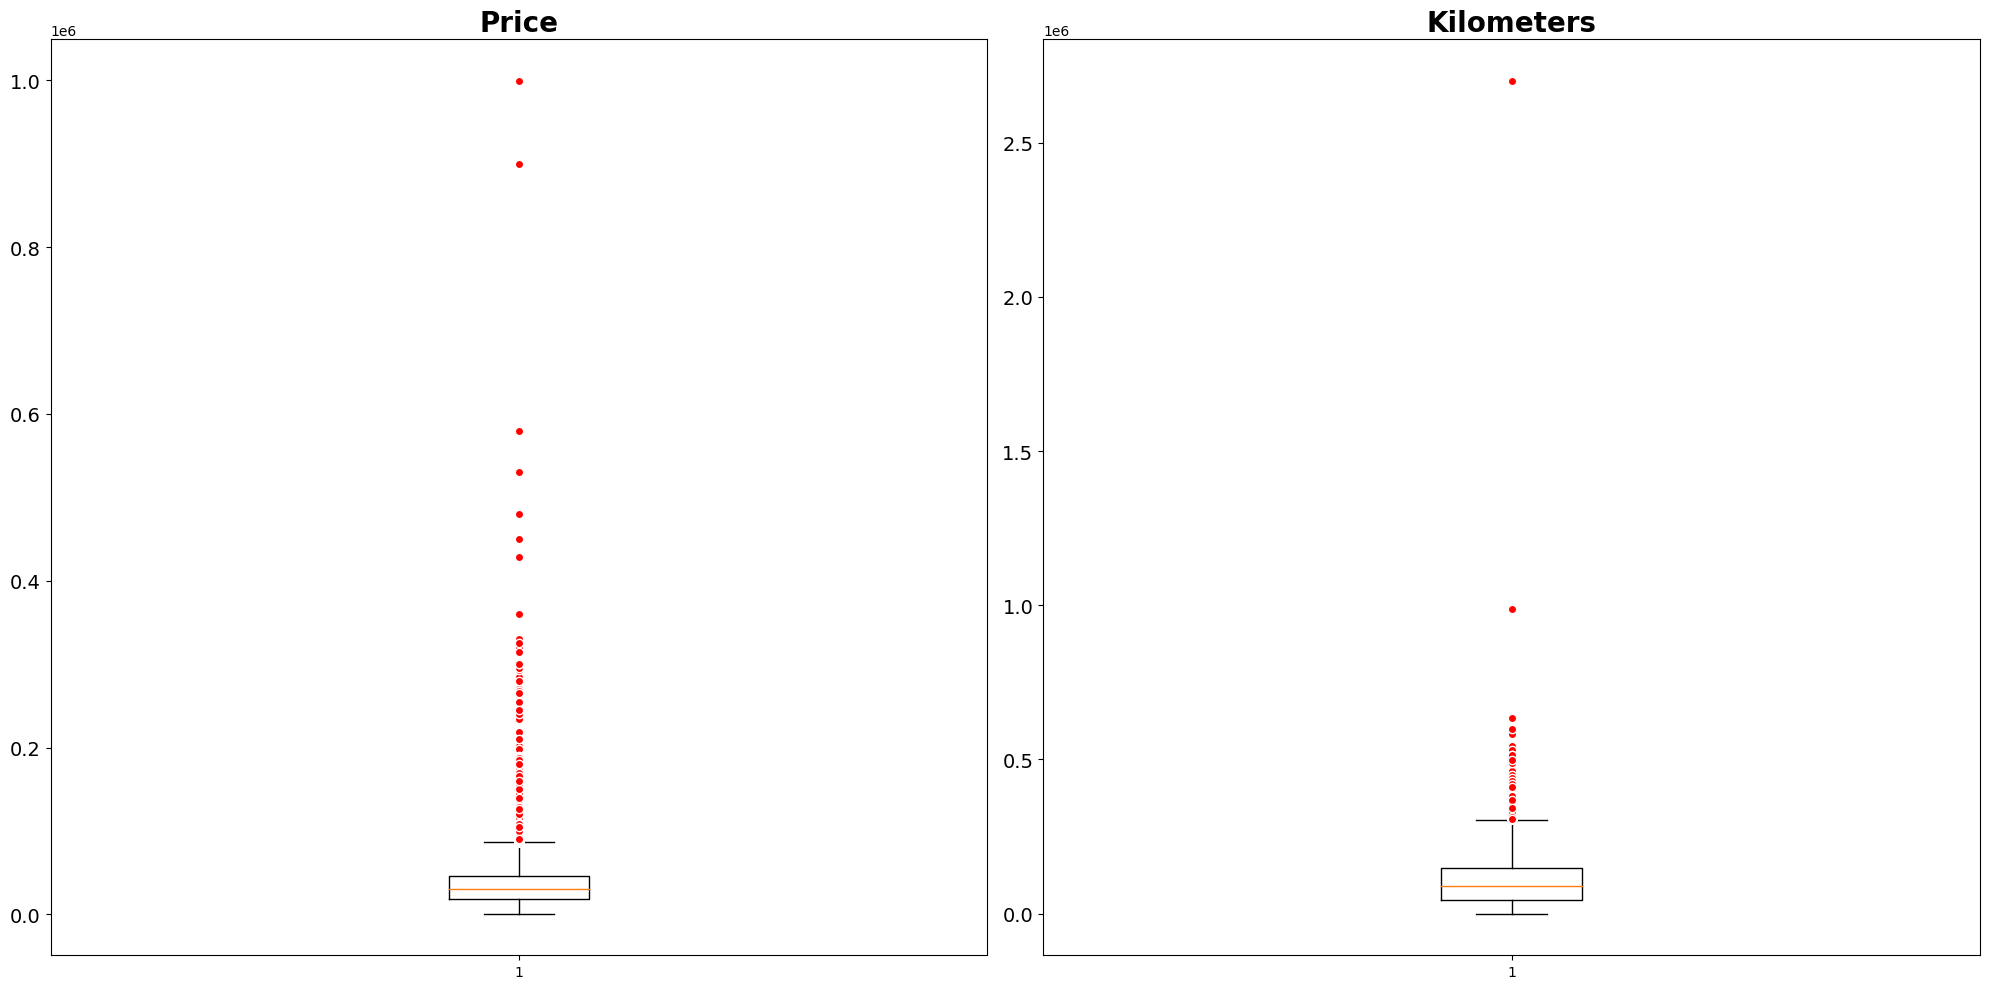

In [33]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fix, axs = plt.subplots(1,2, figsize=(20,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.loc[:,['Price', 'Kilometers']].iloc[:,i], flierprops=red_circle)
  ax.set_title(df.loc[:,['Price', 'Kilometers']].columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

Taking into account that the scale is in a million, we have cars with a price of almost a million and cars that have run more than 2 million kilometres. 

Would this be really true? 2 million kilometres seems a lot for a car to run.

We will check it after and see if it seems really right. If it's not, we will take it off and filter properly the dataset.

First, since we are looking for the used cars, we will filter them and analyse them separated.

In [36]:
df2 = df.copy()

df2.Status = df2.Status.str.strip()

df2.Status[0]

'Used'